🔢 Sınıf Dağılımı:
AAltan          40
AAydintasbas    40
YCongar         40
TAkyol          40
SOzisik         40
NIlicak         40
NBKaraca        40
MTonbekici      40
MNHazar         40
MBarlas         40
MBaransu        40
MABirand        40
IKucukkaya      40
HUluc           40
HCemal          40
HBabaoglu       40
GGokturk        40
ECakir          40
EArdic          40
DUAribogan      40
DCundioglu      40
COzdemir        40
CCandar         40
BCoskun         40
AYArslan        40
ATuranAlkan     40
AHakan          40
YOzdil          40
dtype: int64


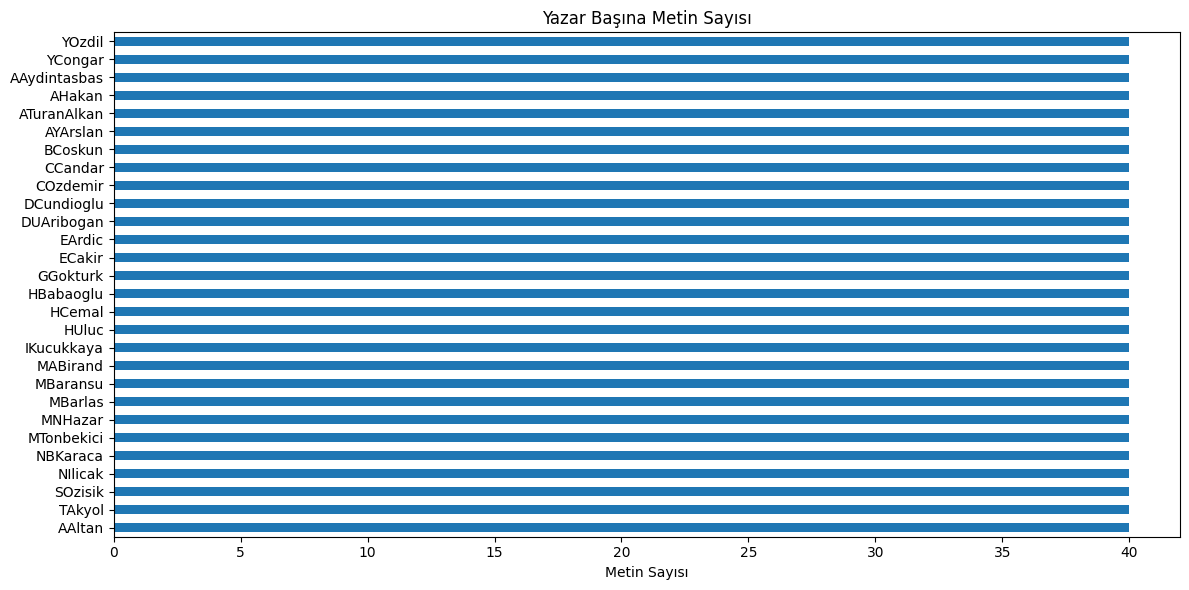


 Classification Report:
              precision    recall  f1-score   support

      AAltan       0.88      1.00      0.93         7
AAydintasbas       0.79      0.85      0.81        13
      AHakan       1.00      1.00      1.00         9
 ATuranAlkan       0.83      0.71      0.77         7
    AYArslan       1.00      1.00      1.00         6
     BCoskun       0.67      1.00      0.80         6
     CCandar       0.75      0.86      0.80         7
    COzdemir       1.00      0.91      0.95        11
  DCundioglu       1.00      0.69      0.82        13
  DUAribogan       1.00      0.78      0.88         9
      EArdic       0.90      1.00      0.95         9
      ECakir       0.50      0.86      0.63         7
    GGokturk       0.55      0.75      0.63         8
   HBabaoglu       1.00      0.47      0.64        15
      HCemal       0.50      0.38      0.43         8
       HUluc       0.60      1.00      0.75         3
  IKucukkaya       0.50      0.57      0.53         7
  

In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

# === Ana klasör yolu ===
main_folder = r'C:\Users\YUCE037\Downloads\AAydintasbas'

texts = []
labels = []

# === Veri oku ===
for author_folder in os.listdir(main_folder):
    author_path = os.path.join(main_folder, author_folder)
    if os.path.isdir(author_path):
        for txt_file in os.listdir(author_path):
            file_path = os.path.join(author_path, txt_file)
            if file_path.endswith(".txt"):
                with open(file_path, "r", encoding="utf-8") as f:
                    texts.append(f.read())
                    labels.append(author_folder)

# === Sınıf dağılımını görselleştir ===
counts = Counter(labels)
print("🔢 Sınıf Dağılımı:")
print(pd.Series(counts).sort_values(ascending=False))

# (Opsiyonel) Bar chart:
plt.figure(figsize=(12, 6))
pd.Series(counts).sort_values().plot(kind='barh')
plt.title("Yazar Başına Metin Sayısı")
plt.xlabel("Metin Sayısı")
plt.tight_layout()
plt.show()

# === TF-IDF dönüşümü ===
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)

# === Etiket encode ===
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# === Eğitim/test bölme ===
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

# === Model (SVM) eğitimi ===
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# === Tahmin ve değerlendirme ===
y_pred = model.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
print(f" Accuracy: {accuracy_score(y_test, y_pred):.2%}")

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeli tanımla
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_mlp = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))



MLP Accuracy: 0.8035714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9
           3       1.00      0.57      0.73         7
           4       0.86      1.00      0.92         6
           5       0.80      0.67      0.73         6
           6       0.78      1.00      0.88         7
           7       0.92      1.00      0.96        11
           8       0.92      0.92      0.92        13
           9       0.90      1.00      0.95         9
          10       0.90      1.00      0.95         9
          11       0.86      0.86      0.86         7
          12       0.64      0.88      0.74         8
          13       0.90      0.60      0.72        15
          14       0.43      0.38      0.40         8
          15       0.50      1.00      0.67         3
          16       0.67 